In [1]:
import pandas as pd
benchmarks = pd.read_csv('benchmark.csv')#,names=['bench','engine','time','gpu'])
benchmarks[0:]

,bench,engine,time,gpu
0,5_newDHFR,openmm,2111.75 +/- 17.46,NVIDIA RTX 6000 Ada Generation
1,5_newDHFR,openmm,1826.00 +/- 16.25,NVIDIA RTX 5000 Ada Generation
2,5_newDHFR,openmm,1397.44 +/- 2.58,NVIDIA RTX A6000
3,5_newDHFR,openmm,1302.83 +/- 18.25,NVIDIA RTX A5500
4,5_newDHFR,openmm,2108.46 +/- 16.70,NVIDIA GeForce RTX 4090
...,...,...,...,...
100,4_HSP90,charmm,62.15 +/- 0.70,NVIDIA RTX A6000
101,4_HSP90,charmm,58.97 +/- 1.74,NVIDIA RTX A5500
102,4_HSP90,charmm,100.82 +/- 1.21,NVIDIA GeForce RTX 4090
103,4_HSP90,charmm,103.87 +/- 1.37,NVIDIA GeForce RTX 3080 Ti


2_T4L


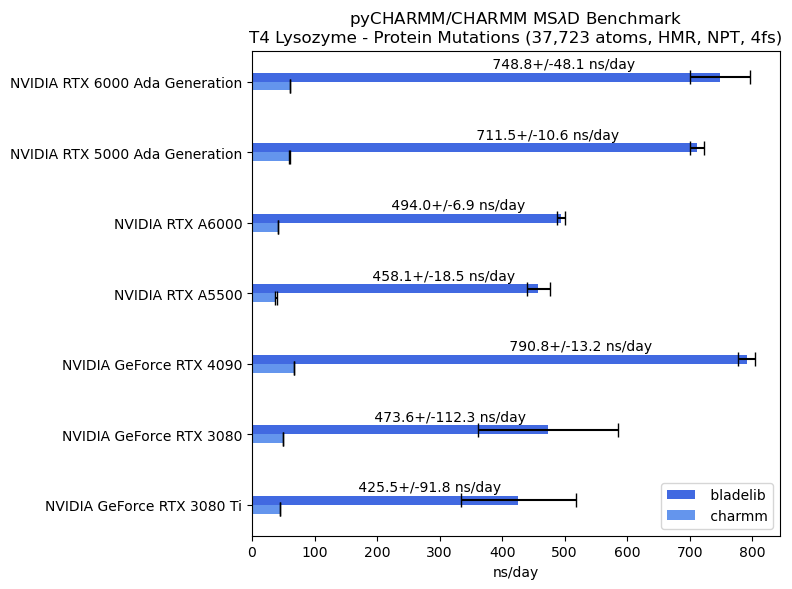

5_newDHFR


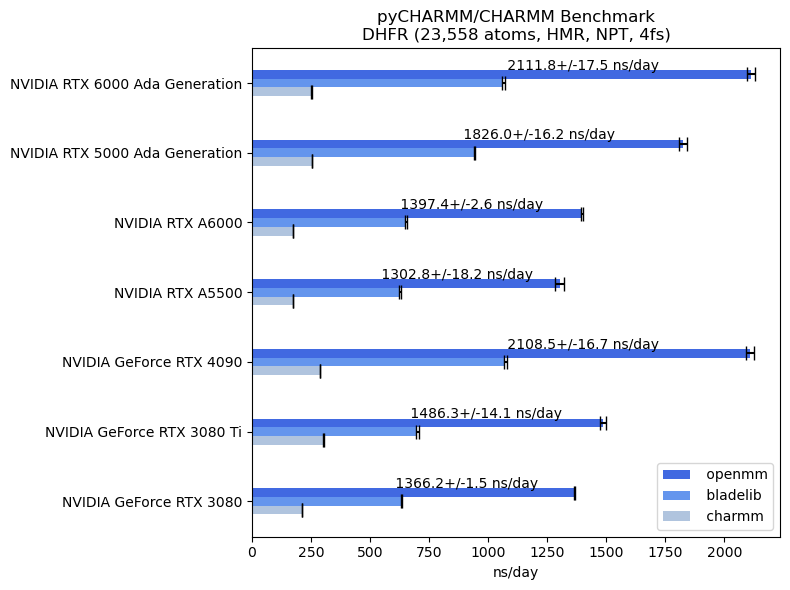

apoa1_bench


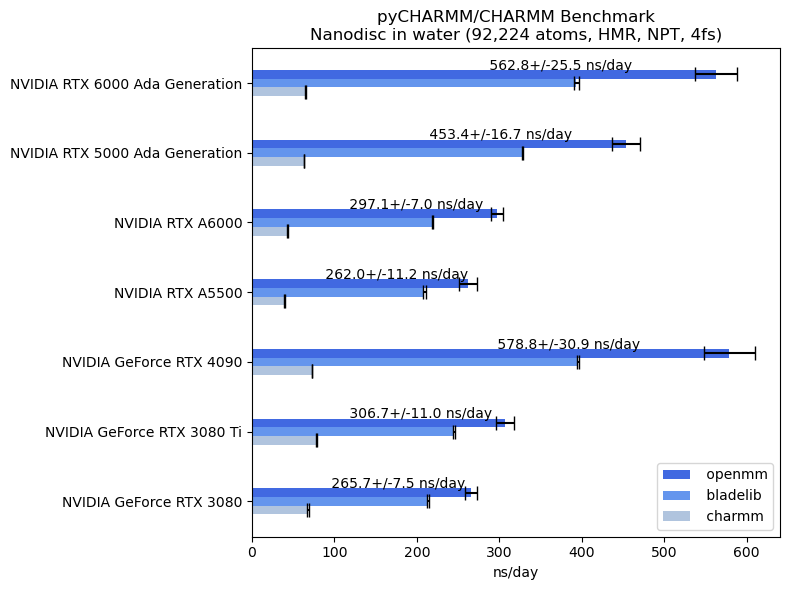

6_dmpg


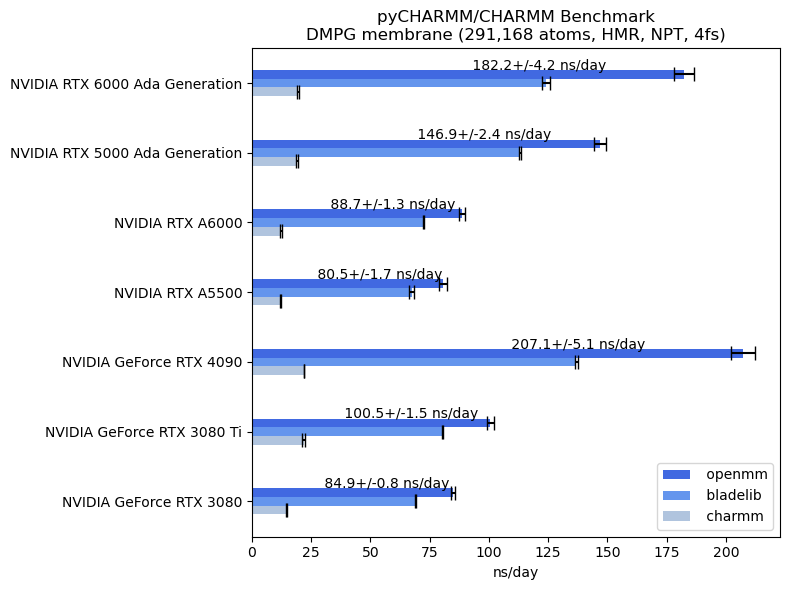

4_HSP90


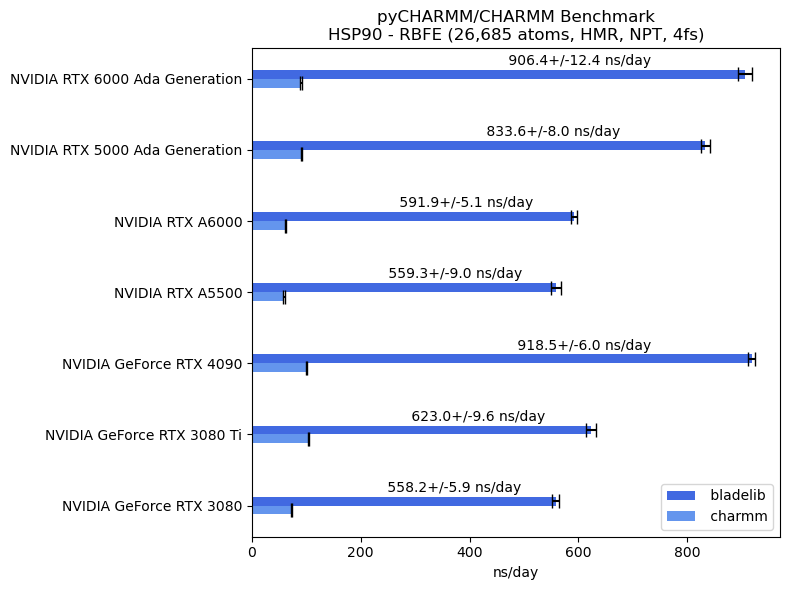

stmv_bench


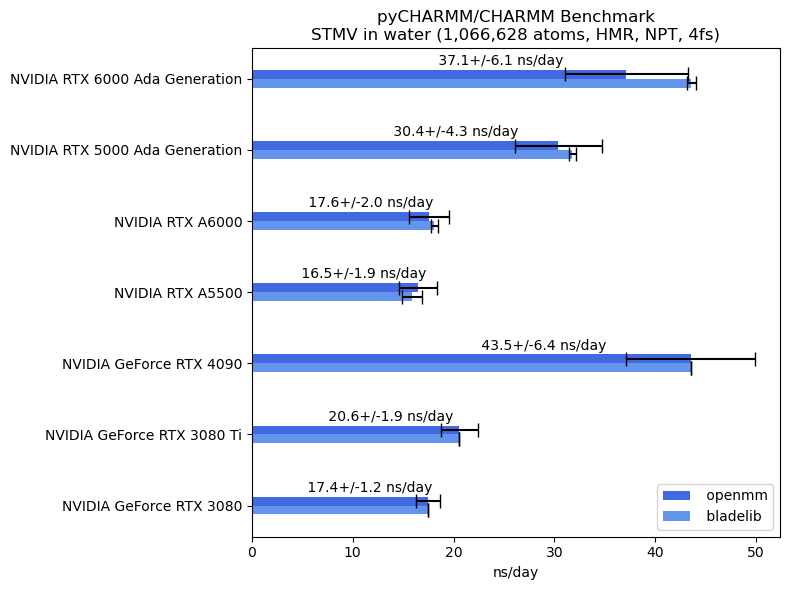

In [2]:
import matplotlib.pyplot as plt
import numpy as np
colors = ['royalblue','cornflowerblue','lightsteelblue','lavender']
y = np.arange(len(set(benchmarks.gpu)))
n_gpus = len(set(benchmarks.gpu))
height = 1/(n_gpus+1)
for bm in set(benchmarks.bench):
    print(bm)
    gpus = list(set(benchmarks.loc[benchmarks.bench == bm].gpu))
    fig, ax = plt.subplots(figsize=(8, 6))
    engines = [' openmm',' bladelib', ' charmm']
    if ('T4' in bm or 'HSP' in bm): engines = [' bladelib', ' charmm']    
    for i, e in enumerate(engines):
        data = benchmarks.loc[benchmarks.bench == bm].loc[benchmarks.engine == e]
        if len(data.time) == 0: continue
        gpus = data.gpu
        x = []
        dx = []
        for v in data.time:
            x.append(float(v.split()[0]))
            dx.append(float(v.split()[2]))
            shift = y+(i-1)*height
            if 'stmv' in bm: shift = y+(i-1/2)*height
            if 'T4' in bm or 'HSP' in bm: shift = y+(i-1/2)*height
        ax.barh(shift, x, height, label=e, xerr=[dx,dx], capsize=5, color=colors[i])
        if i == 0:
            displace = 2*height
            #if 'stmv' in bm: displace = height
            for j,vs in enumerate(x):
                ax.text(0.66*vs, j-displace, f' {vs:.1f}+/-{dx[j]:.1f} ns/day', ha='center', va='center')
    ax.set_yticks(y)
    ax.set_yticklabels(gpus)
    ax.invert_yaxis()  # Labels read top-to-bottom
    ax.set_xlabel('ns/day')
    if 'DHFR' in bm:
        bench = 'DHFR (23,558 atoms, HMR, NPT, 4fs)'
    elif 'dmpg' in bm:
        bench = 'DMPG membrane (291,168 atoms, HMR, NPT, 4fs)'
    elif 'apoa1' in bm:
        bench = 'Nanodisc in water (92,224 atoms, HMR, NPT, 4fs)'
    elif 'stmv' in bm:
        bench = 'STMV in water (1,066,628 atoms, HMR, NPT, 4fs)'
    elif 'T4' in bm:
        bench = 'T4 Lysozyme - Protein Mutations (37,723 atoms, HMR, NPT, 4fs)'
    elif 'HSP' in bm:
        bench = 'HSP90 - RBFE (26,685 atoms, HMR, NPT, 4fs)'
    if not 'T4' in bm or 'HSP' in bm: ax.set_title(f'pyCHARMM/CHARMM Benchmark\n{bench}')
    else: ax.set_title(f'pyCHARMM/CHARMM MS$\lambda$D Benchmark\n{bench}')
    ax.legend()
    plt.tight_layout()
    plt.savefig(f'figures/{bm}.pdf')
    plt.savefig(f'figures/{bm}.jpg')
    plt.show()